In [1]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [2]:
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

In [3]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [4]:
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

In [5]:
# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

In [6]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [7]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

In [8]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [9]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

In [10]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [11]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [12]:
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [13]:
# kNN Algorithm input
def k_nearest_neighbors(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)

In [14]:
# Test the kNN on the data-penduduk-dki-berdasarkan-pekerjaan-tahun-2014 Cleasing.csv dataset
seed(1)
filename = 'data-penduduk-dki-berdasarkan-pekerjaan-tahun-2014 Cleasing.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 6
num_neighbors = 3
scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [43.18181818181818, 38.63636363636363, 36.36363636363637, 38.63636363636363, 27.27272727272727, 38.63636363636363]
Mean Accuracy: 37.121%


In [15]:
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

In [16]:
# Make a prediction with KNN on data-penduduk-dki-berdasarkan-pekerjaan-tahun-2014 Cleasing.csv Dataset
filename = 'data-penduduk-dki-berdasarkan-pekerjaan-tahun-2014 Cleasing.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# define model parameter
num_neighbors = 3
# define a new record
row = [10088,13652,14235,736,255,22,37,1,1,0,0,24,22,5,18483,42,3,9,1356,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,5,11,0,0,0,0,0,36,3,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,356,1,21,9,3,4,10,243,10,9,3,1,0,0,0,3,209,0,0,116,0,0,1,5650,361,0]
# predict the label
label = predict_classification(dataset, row, num_neighbors)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
print('Data=%s, Predicted: %s' % (row, label))

[JAKARTA PUSAT] => 0
[JAKARTA SELATAN] => 1
[JAKARTA TIMUR] => 2
[KAB.ADM.KEP.SERIBU] => 3
[JAKARTA UTARA] => 4
[JAKARTA BARAT] => 5
Mean Accuracy: 37.121%
Data=[10088, 13652, 14235, 736, 255, 22, 37, 1, 1, 0, 0, 24, 22, 5, 18483, 42, 3, 9, 1356, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 11, 0, 0, 0, 0, 0, 36, 3, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 63, 356, 1, 21, 9, 3, 4, 10, 243, 10, 9, 3, 1, 0, 0, 0, 3, 209, 0, 0, 116, 0, 0, 1, 5650, 361, 0], Predicted: 5


In [17]:
"""Simple algortime"""

'Simple algortime'

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data_pekerja = pd.read_csv('data-penduduk-dki-berdasarkan-pekerjaan-tahun-2014 Cleasing.csv')
data_pekerja.head()

,1508,1475,1603,21,185,4,10,6,0,0.1,...,0.58,0.59,11,0.60,0.61,0.62,114,24,0.63,KAB.ADM.KEP.SERIBU
0,1473,1613,1539,9,65,0,9,2,0,1,...,0,0,9.0,0,0,0,129,10,0,KAB.ADM.KEP.SERIBU
1,476,564,521,2,30,0,2,0,1,0,...,0,0,0.0,0,0,0,26,3,0,KAB.ADM.KEP.SERIBU
2,526,507,500,11,39,1,11,8,3,0,...,0,0,14.0,0,0,0,135,25,0,KAB.ADM.KEP.SERIBU
3,1205,1163,1160,14,117,0,8,4,0,1,...,0,0,16.0,0,0,0,152,14,0,KAB.ADM.KEP.SERIBU
4,587,686,722,2,12,1,0,2,1,0,...,0,0,2.0,0,0,0,67,32,0,KAB.ADM.KEP.SERIBU


In [20]:
X = data_pekerja.iloc[:, :-1].values
y = data_pekerja.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  2  2  1  0  0]
 [ 8  1  2  2  0  0]
 [ 5  1 13  8  0  0]
 [ 2  0  3 10  0  0]
 [ 4  1  0  1  4  0]
 [ 0  0  0  0  0  1]]
                    precision    recall  f1-score   support

     JAKARTA BARAT       0.44      0.75      0.56        20
     JAKARTA PUSAT       0.20      0.08      0.11        13
   JAKARTA SELATAN       0.65      0.48      0.55        27
     JAKARTA TIMUR       0.45      0.67      0.54        15
     JAKARTA UTARA       1.00      0.40      0.57        10
KAB.ADM.KEP.SERIBU       1.00      1.00      1.00         1

          accuracy                           0.51        86
         macro avg       0.62      0.56      0.56        86
      weighted avg       0.54      0.51      0.49        86



In [26]:
error = []

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

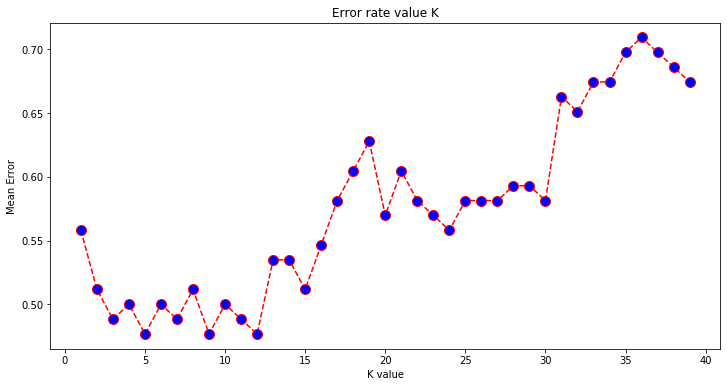

In [27]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker = 'o', markerfacecolor='blue', markersize=10)
plt.title('Error rate value K')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [28]:
classifier.fit(X, y)
sampel = np.array([[2928,3964,6031,558,496,23,24,2,1,1,2,4,3,1,6829,197,6,18,152,0,0,0,16,0,0,0,0,0,0,6,0,0,0,0,0,21,0,0,1,0,1,18,0,39,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,167,3,33,17,8,0,19,174,6,12,2,1,0,2,2,2,64,0,0,144,0,0,0,1914,135,0]])
classifier.predict(sampel)

array(['JAKARTA PUSAT'], dtype=object)